In [165]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re
import scipy as sp
# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

from IPython.display import HTML, display, clear_output

try:
    pyplot.rcParams["animation.html"] = "jshtml"
except ValueError:
    pyplot.rcParams["animation.html"] = "html5"

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# K-means Clustering

The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set $\{x^{(1)} , \cdots, x^{(m)}\}$ (where $x^{(i)} \in \mathbb{R}^n$), and want to group the data into a few cohesive “clusters”. The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

In [166]:
data1 = os.path.join(loadmat('ex7data1.mat'))
data1.keys()

['X', '__version__', '__header__', '__globals__']

In [167]:
X1 = data1['X']
X1.shape

(50, 2)

## Assign clusters - closest cluster

In the “cluster assignment” phase of the K-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Specifically, for every example $i$ we set

$$c^{(i)} := j \quad \text{that minimizes} \quad \lvert\rvert x^{(i)} - \mu_j  \lvert\rvert^2, $$
where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and $\mu_j$ is the position (value) of the $j^{th}$ centroid. Note that $c^{(i)}$ corresponds to idx[i] in the starter code.

Your task is to complete the code in the function findClosestCentroids. This function takes the data matrix X and the locations of all centroids inside centroids and should output a one-dimensional array idx that holds the index (a value in $\{1, ..., K\}$, where $K$ is total number of centroids) of the closest centroid to every training example.

You can implement this using a loop over every training example and every centroid.

 
"""
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.
    
    Instructions
    ------------
    Go over every example, find its closest centroid, and store
    the index inside `idx` at the appropriate location.
    Concretely, idx[i] should contain the index of the centroid
    closest to example i. Hence, it should be a value in the 
    range 0..K-1

    Note
    ----
    You can use a for-loop over the examples to compute this.
"""



In [168]:
def findClosestCentroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = []
    
    for i in range(m):
        for j in range(k):
            distance =  X[i,:] -  centroids[j,:] 
            norm = np.dot(distance,distance.T)
            idx.append(norm.argmin())
        
    return idx
 

In [169]:
# Select an initial set of centroids
K = 3
centroids = sp.array([[3, 3], [6, 2], [8, 5]])
# Find the closest centroids for the examples using the initial_centroids
centroid_indices = findClosestCentroids(X1, centroids)
print('Closest centroids for the first 3 examples:')
print centroid_indices[:3]

print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0, 0, 0]
(the closest centroids should be 0, 2, 1 respectively)


## Computing centroid means


Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specifically, for every centroid $k$ we set

$$ \mu_k := \frac{1}{\left| C_k\right|} \sum_{i \in C_k} x^{(i)}$$
where $C_k$ is the set of examples that are assigned to centroid $k$. Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then you should update $\mu_2 = \frac{1}{2} \left( x^{(3)} + x^{(5)} \right)$.

You should now complete the code in the function computeCentroids. You can implement this function using a loop over the centroids. You can also use a loop over the examples; but if you can use a vectorized implementation that does not use such a loop, your code may run faster.

In [170]:
def compute_means(X, idx, K):

    m, n = X.shape
 
    means = []
 
    for i in range(K):
        #idx = findClosestCentroids(X1, centroids)
        centroid_examples = np.nonzero(idx == i)[0]
        means.append(np.mean( X[centroid_examples,:], axis=0 ))
      
    return np.array(means)

 

In [171]:

centroids = compute_means(X1, centroid_indices, K)
print centroids

[[nan nan]
 [nan nan]
 [nan nan]]


## Random initialization

In [172]:
def kMeansInitCentroids(X, K):

    m, n = X.shape
    
    # You should return this values correctly
    centroids = np.zeros((K, n))

    # ====================== YOUR CODE HERE ======================

    centroids = X[np.random.choice(X.shape[0], K)]
    
    # =============================================================
    return centroids



### K-mean

In [173]:
centroids = kMeansInitCentroids(X1, K)
iterations = 1000
for i in range(iterations):
    # Cluster assignment step: Assign each data point to the
    # closest centroid. idx[i] corresponds to cˆ(i), the index
    # of the centroid assigned to example i
    idx = findClosestCentroids(X1, centroids)

    # Move centroid step: Compute means based on centroid
    # assignments
    centroids = compute_means(X1, idx, K)

In [174]:
X1[np.random.choice(X1.shape[0], K)].shape

(3, 2)

# Principal Component Analysis

In [175]:
data = os.path.join(loadmat('ex7data1.mat'))

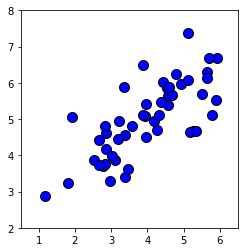

In [176]:
X= data['X']
#  Visualize the example dataset
pyplot.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
pyplot.axis([0.5, 6.5, 2, 8])
pyplot.gca().set_aspect('equal')
pyplot.grid(False)

In this part of the exercise, you will implement PCA. PCA consists of two computational steps:

Compute the covariance matrix of the data.
Use SVD (in python we use numpy's implementation np.linalg.svd) to compute the eigenvectors $U_1$, $U_2$, $\dots$, $U_n$. These will correspond to the principal components of variation in the data.
First, you should compute the covariance matrix of the data, which is given by:

$$ \Sigma = \frac{1}{m} X^T X$$
where $X$ is the data matrix with examples in rows, and $m$ is the number of examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator.

After computing the covariance matrix, you can run SVD on it to compute the principal components. In python and numpy (or scipy), you can run SVD with the following command: U, S, V = np.linalg.svd(Sigma), where U will contain the principal components and S will contain a diagonal matrix. Note that the scipy library also has a similar function to compute SVD scipy.linalg.svd. The functions in the two libraries use the same C-based library (LAPACK) for the SVD computation, but the scipy version provides more options and arguments to control SVD computation. In this exercise, we will stick with the numpy implementation of SVD.

Complete the code in the following cell to implemente PCA.

In [177]:
def featureNormalize(X):
    
    mu = np.mean(X,axis = 0)
    std = np.std(X, axis = 0)
    X_normalized = (X - mu) /std
    X_normalized = (X - mu) /std
    return X_normalized, mu, std
 

In [178]:
def pca(X):
    m,n = X.shape
    U = np.zeros(n)
    S = np.zeros(n)
    
    # compute the covariance matrix
    sigma = np.dot(X,X.T)/m
    
    U, S, Vh = np.linalg.svd(sigma)
     
    
    return U,S
    

Top eigenvector: U[:, 0] = [-0.160628 0.098995]


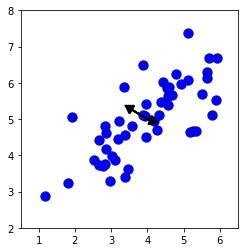

In [179]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
fig, ax = pyplot.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))


### Dimensionality Reduction with PCA

In [180]:
def projectData(X, U, K):
    m ,n = X.shape
    
    Z = np.zeros((m,K))
    
    U_reduced = U[:,:K]
    Z = np.dot(X.T,U)
    return Z

In [181]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))


Projection of the first example: 6.586976


In [182]:
def recoverData(Z, U, K):
    X_recovered = np.zeros((Z.shape[0],U.shape[0]))
    U_reduce = U[:,:K]
    X_recovered = np.dot(Z,U_reduce)
    return X_recovered

In [186]:

X_rec  = recoverData(Z, U, K)
 
